In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import io

In [2]:
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import files

# Read in the data

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '117-mdhSVVebxIOvsy-LffRsKCCrAWALU' 
download = drive.CreateFile({'id': file_id})

# Download the file to a local disc
download.GetContentFile('file.tsv')

df = pd.read_csv('file.tsv', sep='\t')

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Explore the data

In [5]:
df.shape

(68507, 708)

In [6]:
df.head()

,CASEID,CLASSID,SCHOOLID,CITYID,SRVDAT1_M,SRVDAT1_Y,SRVDAT1_D,SRVDAT2_M,SRVDAT2_Y,SRVDAT2_D,SRVMODE,NATSAMP,ACOUNTRY,SCOUNTRY,COUNTRY,CCOUNTRY,CNTCLST1,CITYSIZE,CITYIMP,SCHLEVEL,PUBLICS,RELIGS,GRADE,CSTYPE,CSLEVEL,CSLEVEL2,CSREG,CSREGID,CSLANG,COMMCOD,QRATING,RECFILE,ID,CHECKNR,MALE,AGE,AGEGROUP,BIRTHP,BIRTHPS,MIGRAGE,BIRTHPM,BIRTHPMS,BIRTHPF,BIRTHPFS,FAMILY,FAMILYS,LANGH,LANGH1,LANGH2,LANGH3,LANGHS,DISCRIM,WORKFATH,WORKFS,WORKMOTH,WORKMS,OWNROOM,COMPUSE,OWNMOBPH,FAMILCAR,VICROBBP,VICROBBI,VICROBBN,VCROBBIA,VCROBBNA,VCROBBIE,VCROBBNE,VICASSAP,VICASSAI,VICASSAN,VCASSAIA,VCASSANA,VCASSAIE,VCASSANE,VICTHEFP,VICTHEFI,VICTHEFN,VCTHEFIA,VCTHEFNA,VCTHEFIE,VCTHEFNE,VICBULLP,VICBULLI,VICBULLN,VCBULLIA,VCBULLNA,VCBULLIE,VCBULLNE,GETALFA,GETALMO,LEISFAM,DINNFAM,KNOWFR,PARSUP,TELLTIME,OBEYTIME,LIFEEV01,LIFEEV02,LIFEEV03,LIFEEV04,LIFEEV05,LIFEEV06,LIFEEV07,LIFEEV08,NIGHTACT,ACTIV01,ACTIV02,ACTIV03,ACTIV04,ACTIV05,ACTIV06,ACTIV07,TRANSP,TRANSP01,TRANSP02,TRANSP03,TRANSP04,TRANSP05,TRANSP06,TRANSP07,TRANSPS,LEISCONT,LEISSP01,LEISSP02,LEISSP03,LEISSP04,GROUPFR,GRPAGE,GRPAGE01,GRPAGE02,GRPAGE03,GRPAGE04,GRPAGE05,GRPPUBL,GRPEXIST,GRPILLAC,GRPILLDO,GRPGANG,GRPGEND,GRPMALE,GRPETHN,ETHNFRND,FRNDAC01,FRNDAC02,FRNDAC03,FRNDAC04,FRNDAC05,FRNDAC06,FRNDAC07,FRNDAC08,FRNDAC09,FRNDACS,ATTVIO01,ATTVIO02,ATTVIO03,ATTVIO04,ATTVIO05,SELFC01,SELFC02,SELFC03,SELFC04,SELFC05,SELFC06,SELFC07,SELFC08,SELFC09,SELFC10,SELFC11,SELFC12,ACCIDP,ACCIDI,ACCIDIA,ACCIDIE,ATTSCH,REPGRADE,TRUANCY,ACHIEV,ATSCH01,ATSCH02,ATSCH03,ATSCH04,ATSCH05,ATSCH06,ATSCH07,ATSCH08,AFTSCH,AFTSCHS,NHOOD01,NHOOD02,NHOOD03,NHOOD04,NHOOD05,NHOOD06,NHOOD07,NHOOD08,NHOOD09,NHOOD10,NHOOD11,NHOOD12,NHOOD13,DELPDR,DELPDRN,DELPDRNA,DELPDRNE,DELPSL,DELPSLN,DELPSLNA,DELPSLNE,DELPBU,DELPBUN,DELPBUNA,DELPBUNE,DELPEX,DELPEXN,DELPEXNA,DELPEXNE,DELPAS,DELPASN,DELPASNA,DELPASNE,BEERLTP,BEERAGE,BEERDR,BEERDRI,BEERDRIA,BEERDRIE,BEERLMP,BEERLMI,BEERGLAS,BEERBOTT,BEERCANS,BEERSOC,BEERSOAL,BEERSOPA,BEERSOAD,BEERSOPE,BEERDT,BEERDTPA,BEERDTPO,BEERDTTE,BEERDTSE,BEERPUN,SPIRLTP,SPIRAGE,SPIRDR,SPIRDRI,SPIRDRIA,SPIRDRIE,SPIRLMP,SPIRLMI,SPIRGLAS,SPIRSOC,SPIRSOAL,SPIRSOAD,SPIRSOPE,SPIRDT,SPIRDTPA,SPIRDTPO,SPIRDTTE,SPIRDTSE,SPIRPUN,HASHLTP,HASHAGE,HASHLMP,HASHLMI,HASHSOC,HASHSOAL,HASHSOAD,HASHSOPE,HASHDT,HASHDTPA,HASHDTPO,HASHDTTE,HASHDTSE,HASHPUN,XTCLTP,XTCAGE,XTCLMP,XTCLMI,XTCSOC,XTCSOAL,XTCSOAD,XTCSOPE,XTCDT,XTCDTPA,XTCDTPO,XTCDTTE,XTCDTSE,XTCPUN,LHCLTP,LHCAGE,LHCLMP,LHCLMI,LHCSOC,LHCSOAL,LHCSOAD,LHCSOPE,LHCDT,LHCDTPA,LHCDTPO,LHCDTTE,LHCDTSE,LHCPUN,HECOLTP,HECOAGE,HECOLMP,HECOLMI,HECOSOC,HECOSOAL,HECOSOAD,HECOSOPE,HECODT,HECODTPA,HECODTPO,HECODTTE,HECODTSE,HECOPUN,VANDLTP,VANDAGE,VANDLYP,VANDLYI,VANDLYIA,VANDLYIE,VANDSOC,VANDSOAL,VANDSOAD,VANDSOPE,VANDDT,VANDDTPA,VANDDTPO,VANDDTTE,VANDDTSE,VANDPUN,SHOPLTP,SHOPAGE,SHOPLYP,SHOPLYI,SHOPLYIA,SHOPLYIE,SHOPSOC,SHOPSOAL,SHOPSOAD,SHOPSOPE,SHOPDT,SHOPDTPA,SHOPDTPO,SHOPDTTE,SHOPDTSE,SHOPPUN,BURGLTP,BURGAGE,BURGLYP,BURGLYI,BURGLYIA,BURGLYIE,BURGSOC,BURGSOAL,BURGSOAD,BURGSOPE,BURGDT,BURGDTPA,BURGDTPO,BURGDTTE,BURGDTSE,BURGPUN,BICTLTP,BICTAGE,BICTLYP,BICTLYI,BICTLYIA,BICTLYIE,BICTSOC,BICTSOAL,BICTSOAD,BICTSOPE,BICTDT,BICTDTPA,BICTDTPO,BICTDTTE,BICTDTSE,BICTPUN,CARTLTP,CARTAGE,CARTLYP,CARTLYI,CARTLYIA,CARTLYIE,CARTSOC,CARTSOAL,CARTSOAD,CARTSOPE,CARTDT,CARTDTPA,CARTDTPO,CARTDTTE,CARTDTSE,CARTPUN,DOWNLTP,DOWNILL,DOWNAGE,DOWNLYP,DOWNLYI,DOWNLYIA,DOWNLYIE,DOWNSOC,DOWNSOAL,DOWNSOAD,DOWNSOPE,DOWNDT,DOWNDTPA,DOWNDTPO,DOWNDTTE,DOWNDTSE,DOWNPUN,HACKLTP,HACKAGE,HACKLYP,HACKLYI,HACKLYIA,HACKLYIE,HACKSOC,HACKSOAL,HACKSOAD,HACKSOPE,HACKDT,HACKDTPA,HACKDTPO,HACKDTTE,HACKDTSE,HACKPUN,CARBLTP,CARBAGE,CARBLYP,CARBLYI,CARBLYIA,CARBLYIE,CARBSOC,CARBSOAL,CARBSOAD,CARBSOPE,CARBDT,CARBDTPA,CARBDTPO,CARBDTTE,CARBDTSE,CARBPUN,SNATLTP,SNATAGE,SNATLYP,SNATLYI,SNATLYIA,SNATLYIE,SNATSOC,SNATSOAL,SNATSOAD,SNATSOPE,SNATDT,SNATDTPA,SNATDTPO,SNATDTTE,SNATDTSE,SNATPUN,WEAPLTP,WEAPAGE,WEAPLYP,WEAPLYI,WEAPLYIA,WEAPLYIE,WEAPOCC,WEAPSOC,WEAPSOAL,WEAPSOAD,WEAPSOPE,WEAPDT,WEAPDTPA,WEAPDTPO,WEAPDTTE,WEAPDTSE,WEAPPUN,EXTOL

In [7]:
df.describe()

,CASEID,CLASSID,SCHOOLID,CITYID,SRVDAT1_M,SRVDAT1_Y,SRVDAT1_D,SRVDAT2_M,SRVDAT2_Y,SRVDAT2_D,SRVMODE,NATSAMP,ACOUNTRY,COUNTRY,CCOUNTRY,CNTCLST1,CITYSIZE,CITYIMP,SCHLEVEL,PUBLICS,RELIGS,GRADE,CSTYPE,CSLEVEL,CSLEVEL2,CSREG,CSREGID,CSLANG,QRATING,RECFILE,MALE,AGE,AGEGROUP,BIRTHP,MIGRAGE,BIRTHPM,BIRTHPF,FAMILY,LANGH,LANGH1,LANGH2,LANGH3,DISCRIM,WORKFATH,WORKMOTH,OWNROOM,COMPUSE,OWNMOBPH,FAMILCAR,VICROBBP,VICROBBI,VICROBBN,VCROBBIA,VCROBBNA,VCROBBIE,VCROBBNE,VICASSAP,VICASSAI,VICASSAN,VCASSAIA,VCASSANA,VCASSAIE,VCASSANE,VICTHEFP,VICTHEFI,VICTHEFN,VCTHEFIA,VCTHEFNA,VCTHEFIE,VCTHEFNE,VICBULLP,VICBULLI,VICBULLN,VCBULLIA,VCBULLNA,VCBULLIE,VCBULLNE,GETALFA,GETALMO,LEISFAM,DINNFAM,KNOWFR,PARSUP,TELLTIME,OBEYTIME,LIFEEV01,LIFEEV02,LIFEEV03,LIFEEV04,LIFEEV05,LIFEEV06,LIFEEV07,LIFEEV08,NIGHTACT,ACTIV01,ACTIV02,ACTIV03,ACTIV04,ACTIV05,ACTIV06,ACTIV07,TRANSP,TRANSP01,TRANSP02,TRANSP03,TRANSP04,TRANSP05,TRANSP06,TRANSP07,LEISCONT,LEISSP01,LEISSP02,LEISSP03,LEISSP04,GROUPFR,GRPAGE,GRPAGE01,GRPAGE02,GRPAGE03,GRPAGE04,GRPAGE05,GRPPUBL,GRPEXIST,GRPILLAC,GRPILLDO,GRPGANG,GRPGEND,GRPMALE,GRPETHN,ETHNFRND,FRNDAC01,FRNDAC02,FRNDAC03,FRNDAC04,FRNDAC05,FRNDAC06,FRNDAC07,FRNDAC08,FRNDAC09,ATTVIO01,ATTVIO02,ATTVIO03,ATTVIO04,ATTVIO05,SELFC01,SELFC02,SELFC03,SELFC04,SELFC05,SELFC06,SELFC07,SELFC08,SELFC09,SELFC10,SELFC11,SELFC12,ACCIDP,ACCIDI,ACCIDIA,ACCIDIE,ATTSCH,REPGRADE,TRUANCY,ACHIEV,ATSCH01,ATSCH02,ATSCH03,ATSCH04,ATSCH05,ATSCH06,ATSCH07,ATSCH08,AFTSCH,NHOOD01,NHOOD02,NHOOD03,NHOOD04,NHOOD05,NHOOD06,NHOOD07,NHOOD08,NHOOD09,NHOOD10,NHOOD11,NHOOD12,NHOOD13,DELPDR,DELPDRN,DELPDRNA,DELPDRNE,DELPSL,DELPSLN,DELPSLNA,DELPSLNE,DELPBU,DELPBUN,DELPBUNA,DELPBUNE,DELPEX,DELPEXN,DELPEXNA,DELPEXNE,DELPAS,DELPASN,DELPASNA,DELPASNE,BEERLTP,BEERAGE,BEERDR,BEERDRI,BEERDRIA,BEERDRIE,BEERLMP,BEERLMI,BEERGLAS,BEERBOTT,BEERCANS,BEERSOC,BEERSOAL,BEERSOPA,BEERSOAD,BEERSOPE,BEERDT,BEERDTPA,BEERDTPO,BEERDTTE,BEERDTSE,BEERPUN,SPIRLTP,SPIRAGE,SPIRDR,SPIRDRI,SPIRDRIA,SPIRDRIE,SPIRLMP,SPIRLMI,SPIRGLAS,SPIRSOC,SPIRSOAL,SPIRSOAD,SPIRSOPE,SPIRDT,SPIRDTPA,SPIRDTPO,SPIRDTTE,SPIRDTSE,SPIRPUN,HASHLTP,HASHAGE,HASHLMP,HASHLMI,HASHSOC,HASHSOAL,HASHSOAD,HASHSOPE,HASHDT,HASHDTPA,HASHDTPO,HASHDTTE,HASHDTSE,HASHPUN,XTCLTP,XTCAGE,XTCLMP,XTCLMI,XTCSOC,XTCSOAL,XTCSOAD,XTCSOPE,XTCDT,XTCDTPA,XTCDTPO,XTCDTTE,XTCDTSE,XTCPUN,LHCLTP,LHCAGE,LHCLMP,LHCLMI,LHCSOC,LHCSOAL,LHCSOAD,LHCSOPE,LHCDT,LHCDTPA,LHCDTPO,LHCDTTE,LHCDTSE,LHCPUN,HECOLTP,HECOAGE,HECOLMP,HECOLMI,HECOSOC,HECOSOAL,HECOSOAD,HECOSOPE,HECODT,HECODTPA,HECODTPO,HECODTTE,HECODTSE,HECOPUN,VANDLTP,VANDAGE,VANDLYP,VANDLYI,VANDLYIA,VANDLYIE,VANDSOC,VANDSOAL,VANDSOAD,VANDSOPE,VANDDT,VANDDTPA,VANDDTPO,VANDDTTE,VANDDTSE,VANDPUN,SHOPLTP,SHOPAGE,SHOPLYP,SHOPLYI,SHOPLYIA,SHOPLYIE,SHOPSOC,SHOPSOAL,SHOPSOAD,SHOPSOPE,SHOPDT,SHOPDTPA,SHOPDTPO,SHOPDTTE,SHOPDTSE,SHOPPUN,BURGLTP,BURGAGE,BURGLYP,BURGLYI,BURGLYIA,BURGLYIE,BURGSOC,BURGSOAL,BURGSOAD,BURGSOPE,BURGDT,BURGDTPA,BURGDTPO,BURGDTTE,BURGDTSE,BURGPUN,BICTLTP,BICTAGE,BICTLYP,BICTLYI,BICTLYIA,BICTLYIE,BICTSOC,BICTSOAL,BICTSOAD,BICTSOPE,BICTDT,BICTDTPA,BICTDTPO,BICTDTTE,BICTDTSE,BICTPUN,CARTLTP,CARTAGE,CARTLYP,CARTLYI,CARTLYIA,CARTLYIE,CARTSOC,CARTSOAL,CARTSOAD,CARTSOPE,CARTDT,CARTDTPA,CARTDTPO,CARTDTTE,CARTDTSE,CARTPUN,DOWNLTP,DOWNILL,DOWNAGE,DOWNLYP,DOWNLYI,DOWNLYIA,DOWNLYIE,DOWNSOC,DOWNSOAL,DOWNSOAD,DOWNSOPE,DOWNDT,DOWNDTPA,DOWNDTPO,DOWNDTTE,DOWNDTSE,DOWNPUN,HACKLTP,HACKAGE,HACKLYP,HACKLYI,HACKLYIA,HACKLYIE,HACKSOC,HACKSOAL,HACKSOAD,HACKSOPE,HACKDT,HACKDTPA,HACKDTPO,HACKDTTE,HACKDTSE,HACKPUN,CARBLTP,CARBAGE,CARBLYP,CARBLYI,CARBLYIA,CARBLYIE,CARBSOC,CARBSOAL,CARBSOAD,CARBSOPE,CARBDT,CARBDTPA,CARBDTPO,CARBDTTE,CARBDTSE,CARBPUN,SNATLTP,SNATAGE,SNATLYP,SNATLYI,SNATLYIA,SNATLYIE,SNATSOC,SNATSOAL,SNATSOAD,SNATSOPE,SNATDT,SNATDTPA,SNATDTPO,SNATDTTE,SNATDTSE,SNATPUN,WEAPLTP,WEAPAGE,WEAPLYP,WEAPLYI,WEAPLYIA,WEAPLYIE,WEAPOCC,WEAPSOC,WEAPSOAL,WEAPSOAD,WEAPSOPE,WEAPDT,WEAPDTPA,WEAPDTPO,WEAPDTTE,WEAPDTSE,WEAPPUN,EXTOLTP,EXTOAGE,EXTOLYP,EXTOLYI,EXTOLYIA,EXTOLYIE,EXTOSOC,EXTOSOAL,EXTOSOAD,EXTOSOPE,EXTODT,EXTODTPA,EXTODTPO,EX

In [8]:
df.dtypes

CASEID         int64
CLASSID        int64
SCHOOLID       int64
CITYID         int64
SRVDAT1_M      int64
SRVDAT1_Y      int64
SRVDAT1_D      int64
SRVDAT2_M      int64
SRVDAT2_Y      int64
SRVDAT2_D      int64
SRVMODE        int64
NATSAMP        int64
ACOUNTRY       int64
SCOUNTRY      object
COUNTRY        int64
CCOUNTRY       int64
CNTCLST1       int64
CITYSIZE       int64
CITYIMP        int64
SCHLEVEL       int64
PUBLICS        int64
RELIGS         int64
GRADE          int64
CSTYPE         int64
CSLEVEL        int64
CSLEVEL2       int64
CSREG          int64
CSREGID        int64
CSLANG         int64
COMMCOD       object
QRATING        int64
RECFILE        int64
ID            object
CHECKNR       object
MALE           int64
AGE            int64
AGEGROUP       int64
BIRTHP         int64
BIRTHPS       object
MIGRAGE        int64
BIRTHPM        int64
BIRTHPMS      object
BIRTHPF        int64
BIRTHPFS      object
FAMILY         int64
FAMILYS       object
LANGH          int64
LANGH1       

In [9]:
df.isna().sum()

CASEID       0
CLASSID      0
SCHOOLID     0
CITYID       0
SRVDAT1_M    0
SRVDAT1_Y    0
SRVDAT1_D    0
SRVDAT2_M    0
SRVDAT2_Y    0
SRVDAT2_D    0
SRVMODE      0
NATSAMP      0
ACOUNTRY     0
SCOUNTRY     0
COUNTRY      0
CCOUNTRY     0
CNTCLST1     0
CITYSIZE     0
CITYIMP      0
SCHLEVEL     0
PUBLICS      0
RELIGS       0
GRADE        0
CSTYPE       0
CSLEVEL      0
CSLEVEL2     0
CSREG        0
CSREGID      0
CSLANG       0
COMMCOD      0
QRATING      0
RECFILE      0
ID           0
CHECKNR      0
MALE         0
AGE          0
AGEGROUP     0
BIRTHP       0
BIRTHPS      0
MIGRAGE      0
BIRTHPM      0
BIRTHPMS     0
BIRTHPF      0
BIRTHPFS     0
FAMILY       0
FAMILYS      0
LANGH        0
LANGH1       0
LANGH2       0
LANGH3       0
LANGHS       0
DISCRIM      0
WORKFATH     0
WORKFS       0
WORKMOTH     0
WORKMS       0
OWNROOM      0
COMPUSE      0
OWNMOBPH     0
FAMILCAR     0
VICROBBP     0
VICROBBI     0
VICROBBN     0
VCROBBIA     0
VCROBBNA     0
VCROBBIE     0
VCROBBNE  

In [10]:
df.isnull().sum()

CASEID       0
CLASSID      0
SCHOOLID     0
CITYID       0
SRVDAT1_M    0
SRVDAT1_Y    0
SRVDAT1_D    0
SRVDAT2_M    0
SRVDAT2_Y    0
SRVDAT2_D    0
SRVMODE      0
NATSAMP      0
ACOUNTRY     0
SCOUNTRY     0
COUNTRY      0
CCOUNTRY     0
CNTCLST1     0
CITYSIZE     0
CITYIMP      0
SCHLEVEL     0
PUBLICS      0
RELIGS       0
GRADE        0
CSTYPE       0
CSLEVEL      0
CSLEVEL2     0
CSREG        0
CSREGID      0
CSLANG       0
COMMCOD      0
QRATING      0
RECFILE      0
ID           0
CHECKNR      0
MALE         0
AGE          0
AGEGROUP     0
BIRTHP       0
BIRTHPS      0
MIGRAGE      0
BIRTHPM      0
BIRTHPMS     0
BIRTHPF      0
BIRTHPFS     0
FAMILY       0
FAMILYS      0
LANGH        0
LANGH1       0
LANGH2       0
LANGH3       0
LANGHS       0
DISCRIM      0
WORKFATH     0
WORKFS       0
WORKMOTH     0
WORKMS       0
OWNROOM      0
COMPUSE      0
OWNMOBPH     0
FAMILCAR     0
VICROBBP     0
VICROBBI     0
VICROBBN     0
VCROBBIA     0
VCROBBNA     0
VCROBBIE     0
VCROBBNE  

In [11]:
cat_col_names = []
num_col_names = []

for col in df.columns:
  if df[col].dtype == 'object':
    cat_col_names.append(col)
  else:
    num_col_names.append(col)

print(cat_col_names)
print()
print(num_col_names)

['SCOUNTRY', 'COMMCOD', 'ID', 'CHECKNR', 'BIRTHPS', 'BIRTHPMS', 'BIRTHPFS', 'FAMILYS', 'LANGHS', 'WORKFS', 'WORKMS', 'TRANSPS', 'FRNDACS', 'AFTSCHS']

['CASEID', 'CLASSID', 'SCHOOLID', 'CITYID', 'SRVDAT1_M', 'SRVDAT1_Y', 'SRVDAT1_D', 'SRVDAT2_M', 'SRVDAT2_Y', 'SRVDAT2_D', 'SRVMODE', 'NATSAMP', 'ACOUNTRY', 'COUNTRY', 'CCOUNTRY', 'CNTCLST1', 'CITYSIZE', 'CITYIMP', 'SCHLEVEL', 'PUBLICS', 'RELIGS', 'GRADE', 'CSTYPE', 'CSLEVEL', 'CSLEVEL2', 'CSREG', 'CSREGID', 'CSLANG', 'QRATING', 'RECFILE', 'MALE', 'AGE', 'AGEGROUP', 'BIRTHP', 'MIGRAGE', 'BIRTHPM', 'BIRTHPF', 'FAMILY', 'LANGH', 'LANGH1', 'LANGH2', 'LANGH3', 'DISCRIM', 'WORKFATH', 'WORKMOTH', 'OWNROOM', 'COMPUSE', 'OWNMOBPH', 'FAMILCAR', 'VICROBBP', 'VICROBBI', 'VICROBBN', 'VCROBBIA', 'VCROBBNA', 'VCROBBIE', 'VCROBBNE', 'VICASSAP', 'VICASSAI', 'VICASSAN', 'VCASSAIA', 'VCASSANA', 'VCASSAIE', 'VCASSANE', 'VICTHEFP', 'VICTHEFI', 'VICTHEFN', 'VCTHEFIA', 'VCTHEFNA', 'VCTHEFIE', 'VCTHEFNE', 'VICBULLP', 'VICBULLI', 'VICBULLN', 'VCBULLIA', 'VCBULLN

In [12]:
for col in cat_col_names:
  print(col, '({})'.format(df[col].nunique()), ":")
  print(df[col].value_counts())
  print()
  print()

SCOUNTRY (30) :
Italy          5300
Switzerland    3643
Germany        3478
Czech Rep.     3245
France         3022
Austria        2994
Portugal       2616
Estonia        2611
USA            2400
Suriname       2399
Netherlands    2330
Venezuela      2322
Russia         2313
Cyprus         2310
Belgium        2308
Sweden         2282
Slovenia       2233
Hungary        2203
Lithuania      2175
Armenia        2044
Bosnia/H.      2017
Spain          1789
NL Antilles    1722
Norway         1694
Ireland        1563
Poland         1458
Denmark        1376
Finland        1364
Aruba           705
Iceland         591
Name: SCOUNTRY, dtype: int64


COMMCOD (1) :
(content removed)    68507
Name: COMMCOD, dtype: int64


ID (2) :
Masked    63696
           4811
Name: ID, dtype: int64


CHECKNR (4) :
correct        31513
not checked    21082
missing ID     14539
                1373
Name: CHECKNR, dtype: int64


BIRTHPS (2) :
          63536
Masked     4971
Name: BIRTHPS, dtype: int64


BIRTHPMS (2)

In [13]:
for col in num_col_names:
  print(col, '({})'.format(df[col].nunique()), ":")
  print(df[col].value_counts())
  print()
  print()

Streaming output truncated to the last 5000 lines.

DRUDDTPO (5) :
8    65020
9     1807
0     1588
1       82
7       10
Name: DRUDDTPO, dtype: int64


DRUDDTTE (5) :
8    65020
9     1807
0     1639
1       31
7       10
Name: DRUDDTTE, dtype: int64


DRUDDTSE (5) :
8    65020
9     1807
0     1596
1       74
7       10
Name: DRUDDTSE, dtype: int64


DRUDPUN (6) :
8    65020
9     1803
2     1414
0      152
1       87
7       31
Name: DRUDPUN, dtype: int64


COMMSTUD (3) :
 0    56178
 1     7518
-9     4811
Name: COMMSTUD, dtype: int64


NATIVE (4) :
3    52798
2    10920
1     4619
9      170
Name: NATIVE, dtype: int64


MIGR (1) :
999    68507
Name: MIGR, dtype: int64


CSMIGR (2) :
-9      59728
 999     8779
Name: CSMIGR, dtype: int64


BIRTHPG (26) :
98    62776
5       955
99      827
3       717
44      562
12      265
43      241
31      240
9       208
4       176
13      159
6       156
11      137
41      129
7       128
8       121
14      111
1        94
15       92
33 

In [14]:
# outliers
def number_of_outliers(df):
    
    df = df.select_dtypes(exclude = 'object')
    
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    return ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

In [15]:
total = number_of_outliers(df)
total

CASEID           0
CLASSID          0
SCHOOLID         0
CITYID           0
SRVDAT1_M        0
SRVDAT1_Y     9837
SRVDAT1_D        0
SRVDAT2_M        0
SRVDAT2_Y     9837
SRVDAT2_D        0
SRVMODE       6383
NATSAMP          0
ACOUNTRY         0
COUNTRY          0
CCOUNTRY         0
CNTCLST1         0
CITYSIZE     12025
CITYIMP      13643
SCHLEVEL         0
PUBLICS      24797
RELIGS           0
GRADE            0
CSTYPE           0
CSLEVEL          0
CSLEVEL2      8778
CSREG            0
CSREGID          0
CSLANG        1711
QRATING       1791
RECFILE      10903
MALE           166
AGE            236
AGEGROUP      5835
BIRTHP        5726
MIGRAGE       8706
BIRTHPM      12926
BIRTHPF      13705
FAMILY        7666
LANGH        10617
LANGH1       10617
LANGH2        9829
LANGH3        7222
DISCRIM       8787
WORKFATH      9285
WORKMOTH      4225
OWNROOM      16951
COMPUSE      11091
OWNMOBPH      7673
FAMILCAR      9413
VICROBBP      5647
VICROBBI      5647
VICROBBN      5645
VCROBBIA    

# Identify Columns From Codebook (metadata)

In [16]:
# Colunn names in dataframe
for col in df.columns:
  if df[col].dtype == 'object':
    cat_col_names.append(col)
  else:
    num_col_names.append(col)

print(cat_col_names)
print()
print(num_col_names)

['SCOUNTRY', 'COMMCOD', 'ID', 'CHECKNR', 'BIRTHPS', 'BIRTHPMS', 'BIRTHPFS', 'FAMILYS', 'LANGHS', 'WORKFS', 'WORKMS', 'TRANSPS', 'FRNDACS', 'AFTSCHS', 'SCOUNTRY', 'COMMCOD', 'ID', 'CHECKNR', 'BIRTHPS', 'BIRTHPMS', 'BIRTHPFS', 'FAMILYS', 'LANGHS', 'WORKFS', 'WORKMS', 'TRANSPS', 'FRNDACS', 'AFTSCHS']

['CASEID', 'CLASSID', 'SCHOOLID', 'CITYID', 'SRVDAT1_M', 'SRVDAT1_Y', 'SRVDAT1_D', 'SRVDAT2_M', 'SRVDAT2_Y', 'SRVDAT2_D', 'SRVMODE', 'NATSAMP', 'ACOUNTRY', 'COUNTRY', 'CCOUNTRY', 'CNTCLST1', 'CITYSIZE', 'CITYIMP', 'SCHLEVEL', 'PUBLICS', 'RELIGS', 'GRADE', 'CSTYPE', 'CSLEVEL', 'CSLEVEL2', 'CSREG', 'CSREGID', 'CSLANG', 'QRATING', 'RECFILE', 'MALE', 'AGE', 'AGEGROUP', 'BIRTHP', 'MIGRAGE', 'BIRTHPM', 'BIRTHPF', 'FAMILY', 'LANGH', 'LANGH1', 'LANGH2', 'LANGH3', 'DISCRIM', 'WORKFATH', 'WORKMOTH', 'OWNROOM', 'COMPUSE', 'OWNMOBPH', 'FAMILCAR', 'VICROBBP', 'VICROBBI', 'VICROBBN', 'VCROBBIA', 'VCROBBNA', 'VCROBBIE', 'VCROBBNE', 'VICASSAP', 'VICASSAI', 'VICASSAN', 'VCASSAIA', 'VCASSANA', 'VCASSAIE', 'VC

### General Info Questions

In [17]:
# Q1) Are you male or female
# 0: female
# 1: male
# 9: no answer
# 7: ambiguous answer

df['MALE'].value_counts()

0    34583
1    33758
9      154
7       12
Name: MALE, dtype: int64

In [18]:
# Q2) How old are you?
# 0: 11
# 1: 12
# 2: 13
# 3: 14
# 9: no answer

df['AGEGROUP'].value_counts()

1    62672
2     5391
9      236
3      153
0       55
Name: AGEGROUP, dtype: int64

In [19]:
# Q3.1) Where you born in this country?
# 0: born in another country
# 1: born in this country

df['BIRTHP'].value_counts()

1    62781
0     5354
9      355
7       17
Name: BIRTHP, dtype: int64

In [20]:
#***** DO NOT USE THIS QUESTION IT'S N/A or NO ANSWER ******

# 3.2) How old when you came in this country? ___ years old
# 97: ambiguous answer, 98: not applicable, 99: no answer
df['MIGRAGE'].value_counts()

 98     59801
 999     5206
 99      1827
-9       1628
 97        45
Name: MIGRAGE, dtype: int64

In [21]:
# Q4) In what country was your mother born?
# 1: She was born in ....
# 2: She was born in another country, namely ___
# 3: She was born in another country, but I don't know where
# 4: I dont know
# 7: ambiguous answer
# 9: no answer

df['BIRTHPM'].value_counts()

1    55581
2    11274
3      627
4      517
9      491
7       17
Name: BIRTHPM, dtype: int64

In [22]:
# Q5) In what country was your father born?
# 1: He was born in another country, namely ___
# 3: He was born in another country, but I don't know where
# 4: I dont know
# 7: ambiguous answer
# 9: no answer

df['BIRTHPF'].value_counts()

1    54802
2    11262
4     1163
3      684
9      573
7       23
Name: BIRTHPF, dtype: int64

In [23]:
# Q6) Are you living with your own mother and father?
# 1: w/ own mother and father
# 2: partly w/ father/mother
# 3: only w/ mother
# 4: only w/ father
# 5: w/ mother and stepfather
# 6: w/ father and stepmother
# 7: w/ other family
# 8: w/ foster family
# 9: w/ other people

df['FAMILY'].value_counts()

1     49515
3      7988
5      4171
2      3338
7      1169
4       887
6       566
9       348
8       196
99      196
97      133
Name: FAMILY, dtype: int64

In [24]:
# Q7) What language do you most often speak with the persons you live with?

df['LANGH1'].value_counts()

1    57890
0     6157
9     4407
7       53
Name: LANGH1, dtype: int64

In [25]:
# Q8) Have  people  ever  treated  you  badly  because  of  your  religion or  the  language  you  speak,  or
# the colour of your skin?
# 1 No, never
# 2 Once
# 3 Sometimes
# 4 Often

df['DISCRIM'].value_counts()


1    59720
3     4122
2     3367
4      880
9      398
7       20
Name: DISCRIM, dtype: int64

In [26]:
# Q9) Does your father (or the man you live with) have a job? 
# 1: y/ permanent job
# 2: y/ own business
# 3: y/ sometimes work
# 4: n/ can't find a job
# 5: n/ is ill/handicapped
# 6: n/ is retired
# 7: n/ other reason
# 97: ambiguous answer
# 98: not around
# 99: no answer

df['WORKFATH'].value_counts()

1     46529
2     10521
98     4020
3      2172
6      1217
4      1165
7       933
99      876
5       753
97      321
Name: WORKFATH, dtype: int64

In [27]:
# Q10) Does your  mother (or  the  woman  you  live  with)  have  a
# paid job?
# 1: y/ permanent job
# 2: y/ own business
# 3: y/ sometimes work
# 4: n/ can't find a job
# 5: n/ is ill/handicapped
# 6: n/ is retired
# 7: n/ other reason
# 97: ambiguous answer
# 98: not around
# 99: no answer

df['WORKMOTH'].value_counts()

1     43704
6      9551
2      4830
3      2933
7      2545
4      2359
5       905
99      850
98      594
97      236
Name: WORKMOTH, dtype: int64

In [28]:
# Q11) Do you have a room of your own?
# 1: Share room
# 0: own room

df['OWNROOM'].value_counts()

1    51556
0    16721
9      192
7       38
Name: OWNROOM, dtype: int64

In [29]:
# Q12) Do you have a computer at home that you are allowed to use?
# 0: no computer to use
# 1: computer to use

df['COMPUSE'].value_counts()

1    57416
0    10872
9      191
7       28
Name: COMPUSE, dtype: int64

In [30]:
# Q13) Do you own a mobile phone?
# 0: no own mobile phone
# 1: own mobile phone

df['OWNMOBPH'].value_counts()

1    60834
0     7468
9      195
7       10
Name: OWNMOBPH, dtype: int64

In [31]:
# Q14) Does your family own a car?
# 0: family has no car
# 1: family has a car

df['FAMILCAR'].value_counts()

1    59094
0     9196
9      191
7       26
Name: FAMILCAR, dtype: int64

### Bad Things That May Have Happened


Note: 15 also has 15.1.2, 15.2.2, etc. I did not include...

In [32]:
# Q15.1) Someone wanted you to give him/her money or
# something else (watch, shoes, mobile phone)
# and threatened you if you did not do it?
# 0: no
# 1: yes

df['VICROBBP'].value_counts()

0    62860
9     2962
1     2642
7       43
Name: VICROBBP, dtype: int64

In [33]:
# Q15.2) Someone hit you violently or hurt you so much
# that you needed to see a doctor?
# 0: no
# 1: yes

df['VICASSAP'].value_counts()

0    62392
9     3409
1     2671
7       35
Name: VICASSAP, dtype: int64

In [34]:
# Q15.3) Something was stolen from you (such as a
# book, money, mobile phone, sport equipment,
# bicycle...)?
# 0: no
# 1: yes

df['VICTHEFP'].value_counts()

0    52235
1    12952
9     3251
7       69
Name: VICTHEFP, dtype: int64

In [35]:
# Q15.4) You were bullied at school (other students
# humiliated you or made fun of you, hit or
# kicked you, or excluded you from their group)
# 0: no
# 1: yes

df['VICBULLP'].value_counts()

0    56184
1     9084
9     3144
7       95
Name: VICBULLP, dtype: int64

### "Your Family"

In [36]:
# ****** THS IS INTERESTING / LOOK AT VALUE "8" ***********

# Q16) How do you usually get along with the man you live with (father, stepfather....)
# 1: not at all
# 2: not so well
# 3: rather well
# 4: very well
# 7: ambiguous answer
# 8: is not around
# 9: no answer

df['GETALFA'].value_counts()

4    42829
3    15799
8     5096
2     3261
1      897
9      386
7      239
Name: GETALFA, dtype: int64

In [37]:
# ****** THS IS INTERESTING / LOOK AT VALUE "8" ***********

# Q17) How do  you  usually  get  along  with  the  woman  you  live  with  ( your  mother  or
# stepmother?
# 1: not at all
# 2: not so well
# 3: rather well
# 4: very well
# 7: ambiguous answer
# 8: is not around
# 9: no answer

df['GETALMO'].value_counts()

4    49614
3    14707
2     2377
8      796
1      524
9      291
7      198
Name: GETALMO, dtype: int64

In [38]:
# ****** THS IS INTERESTING ***********

# Q18) How often do you and your parents (or the adults you live with) do something together, such
# as going to the movies, going for a walk or hike, visiting relatives, attending a sporting event,
# and things like that?
# 1: almost never
# 2: onc/year
# 3: few times/year
# 4: once/month
# 5: once/week
# 6: more than once/week

df['LEISFAM'].value_counts()

5    22982
6    18077
4    12852
3     7821
1     4926
2     1292
9      307
7      250
Name: LEISFAM, dtype: int64

In [39]:
# Q19)  How many days a week do you usually eat the evening meal with (one of) your parents( or the
# adults you live with)?
# 1: never
# 2: 1/week
# 3: 2/week
# 4: 3/week
# 5: 4/week
# 6: 5/week
# 7: 6/week
# 8: daily

df['DINNFAM'].value_counts()

8     42509
6      4098
1      3903
4      3813
7      3800
3      3673
5      3253
2      3003
99      284
97      171
Name: DINNFAM, dtype: int64

In [40]:
# Q20) Do your parents (or the adults you live with) usually know who you are with when you go out?
# 1: rarely/never
# 2: sometimes
# 3: always
# 7: ambiguous answer
# 8: I don't go out
# 9: no answer

df['KNOWFR'].value_counts()

3    38042
2    23434
1     3493
8     2669
7      636
9      233
Name: KNOWFR, dtype: int64

In [41]:
# Q21) When  you  go  out  at  night  do  your  parents  (or  the  family  you  live  with)  generally tell  you  at  what
# time you have to be back?
# 0: no
# 1: yes
# 7: ambiguous answer
# 8: I don't go out
# 9: no answer

df['TELLTIME'].value_counts()

1    46469
8    11615
0     9362
7      635
9      426
Name: TELLTIME, dtype: int64

In [42]:
# Q21.1) Do you do what they tell you ?
# 1: rarely/never
# 2: sometimes
# 3: always
# 7: ambiguous answer
# 8: not applicable
# 9: no answer

df['OBEYTIME'].value_counts()

 3    24512
 8    20436
 2    18603
 9     2389
 1     1460
-9      558
 7      549
Name: OBEYTIME, dtype: int64

In [43]:
# Q22.1) Have you ever experienced any of the following serious events?

# Death of a brother/sister 
# 0: no
# 1: yes

df['LIFEEV01'].value_counts()

0    64512
1     2520
9     1423
7       52
Name: LIFEEV01, dtype: int64

In [44]:
# Q22.2) Death of your father or mother* 
# 0: no
# 1: yes

df['LIFEEV02'].value_counts()

0    63746
1     3189
9     1476
7       96
Name: LIFEEV02, dtype: int64

In [45]:
# ******** Interesting ********

# Q22.3) Death of somebody else you love
# 0: no
# 1: yes

df['LIFEEV03'].value_counts()

1    39800
0    26058
9     2505
7      144
Name: LIFEEV03, dtype: int64

In [46]:
# Q22.4) Long or serious illness of yourself 
# 0: no
# 1: yes

df['LIFEEV04'].value_counts()

0    57831
1     8399
9     2191
7       86
Name: LIFEEV04, dtype: int64

In [47]:
df['LIFEEV06'].value_counts()

0    62112
1     4868
9     1481
7       46
Name: LIFEEV06, dtype: int64

### Leisure Time / friends

In [48]:
# Q23)

In [49]:
# Q24.1-7)

In [50]:
# Q25)

In [51]:
# Q26)

In [52]:
# Q27)

In [53]:
# Q28)

In [54]:
# Q29)

In [55]:
# Q30)

In [56]:
# Q31)

df['GRPILLAC'].value_counts()

 0    37497
 8    15176
 1    13600
 9     1660
 7      359
-9      215
Name: GRPILLAC, dtype: int64

In [57]:
# Q32)


In [58]:
# Q33)

In [59]:
# Q34)

In [60]:
# Q35)

In [61]:
# Q36)

In [62]:
# Q37.1-9)

In [63]:
# Q38

In [64]:
# Q39.1-.12)

In [65]:
# Q40)

### School

In [66]:
# Q41)

In [67]:
# Q42)

In [68]:
# Q43)

In [69]:
# Q44)

In [70]:
# Q45.1-8)

In [71]:
# Q46)

### Your Neighbourhood

In [72]:
# Q47.1-13)

In [73]:
# Q48.1-5)

### Substance Use

In [74]:
# Q49.1-7)
df['BEERLTP'].value_counts()

1    41486
0    25872
9     1126
7       23
Name: BEERLTP, dtype: int64

In [75]:
# Q50.1-7
df['SPIRLTP'].value_counts()

0    44151
1    22810
9     1539
7        7
Name: SPIRLTP, dtype: int64

In [76]:
# Q51.1-5)


In [77]:
# Q52.1-5)

In [78]:
# Q53.1-5)

### Crime / Illegal acts

### Damage Something on purpose

In [79]:
# Q54.1-5) 

# 54.0) Did  you  ever  damage  on  purpose  something,  such  as  a  bus  shelter,  a  window,  a  car  or a
# seat in the bus or train or?
# 0: no
# 1: yes

# IF "yes" then go to 54.1, etc
df['VANDLTP'].value_counts()


0    58565
1     8444
9     1492
7        6
Name: VANDLTP, dtype: int64

In [80]:
# 54.1
# How old were you when you did this for the first time?
df['VANDAGE'].value_counts()

98    58565
2      5252
1      2480
99     2121
3        80
97        9
Name: VANDAGE, dtype: int64

In [81]:
#54.2
# Did you do this during the last 12 months?

df['VANDLYP'].value_counts()

0    62045
1     4786
9     1661
7       15
Name: VANDLYP, dtype: int64

### Stealing from shop or store

In [82]:
# Q55.1-5)
# stealing from shop / store

df['SHOPLTP'].value_counts()

0    55858
1    11169
9     1476
7        4
Name: SHOPLTP, dtype: int64

### Breaking into building to steal

In [83]:
# Q56.1-5)
# break into buidling to steal

df['BURGLTP'].value_counts()

0    65728
9     1584
1     1192
7        3
Name: BURGLTP, dtype: int64

### Stealing bicycle, moped, scooter

In [84]:
# Q57.1-5)
# steal bike, moped, scooter

df['BICTLTP'].value_counts()

0    64761
1     2232
9     1512
7        2
Name: BICTLTP, dtype: int64

### Stealing motorbike or car

In [85]:
# Q58.1-5)
# steal motobike or car

df['CARTLTP'].value_counts()

0    66205
9     1619
1      682
7        1
Name: CARTLTP, dtype: int64

### Illegal downloading music / films (weak crime)

In [86]:
# Q59.1-6)

# Not a crime...???
# Download music or films w/ computer

df['DOWNLTP'].value_counts()

1    38095
0    28917
9     1480
7       15
Name: DOWNLTP, dtype: int64

### Computer Hacking

In [87]:
# Q60.1-5)
# computer hacking

df['HACKLTP'].value_counts()

0    61739
1     5081
9     1683
7        4
Name: HACKLTP, dtype: int64

### Stealing out of or from car

In [88]:
# Q61.1-5)
# steal out of or from car

df['CARBLTP'].value_counts()

0    65301
1     1660
9     1546
Name: CARBLTP, dtype: int64

### Snatching purse, bag or something from person

In [89]:
# Q62.1-5)
# snatch purse, bag or something from person

df['SNATLTP'].value_counts()

0    65049
1     1760
9     1698
Name: SNATLTP, dtype: int64

### Carrying a weapon

In [90]:
# Q63.1-5)
# carry a weapon, stick, knife, or chain

df['WEAPLTP'].value_counts()

0    59428
1     7521
9     1551
7        7
Name: WEAPLTP, dtype: int64

### Threaten someone with weapon to beat them to get money or other things

In [91]:
# Q64.1-5)
# Threaten somebody with weapon or to beat them up
# to get money or other things

df['EXTOLTP'].value_counts()

0    65455
9     1710
1     1336
7        6
Name: EXTOLTP, dtype: int64

### Participate in group fight (gang?)

In [92]:
# Q65.1-5)
# participate in group fight 

df['GFIGLTP'].value_counts()

0    54061
1    12798
9     1642
7        6
Name: GFIGLTP, dtype: int64

### Intentionally beat someone up, or hurt with weapon, and they have to see doctor

In [93]:
# Q66.1-5)
# intentionally beat someone up, or hurt them with weapon, 
# they have to see doctor

df['ASLTLTP'].value_counts()

0    64571
1     2265
9     1666
7        5
Name: ASLTLTP, dtype: int64

### Sell Drugs

In [94]:
# Q67.1-5)
# sell drugs

df['DRUDLTP'].value_counts()

0    65020
1     1750
9     1727
7       10
Name: DRUDLTP, dtype: int64

# Create New Dataframe w/ only Metadata

In [95]:
df_family = df[['CASEID','SCOUNTRY','MALE','AGEGROUP','BIRTHP','BIRTHPM','BIRTHPF','FAMILY','LANGH1','DISCRIM','WORKFATH','WORKMOTH','FAMILCAR','GETALFA','GETALMO','LEISFAM','DINNFAM','KNOWFR','TELLTIME','OBEYTIME','LIFEEV02','LIFEEV05','LIFEEV06','LIFEEV07','LIFEEV08','LEISSP02','VANDLTP','BEERLTP','SPIRLTP','HASHLTP','XTCLTP','LHCLTP','VANDLTP','SHOPLTP','BURGLTP','BICTLTP','CARTLTP','DOWNLTP','HACKLTP','CARBLTP','SNATLTP','WEAPLTP','EXTOLTP','GFIGLTP','ASLTLTP','DRUDLTP']]

In [96]:
df_family['CASEID'].is_unique

True

In [97]:
df_family.head()

,CASEID,SCOUNTRY,MALE,AGEGROUP,BIRTHP,BIRTHPM,BIRTHPF,FAMILY,LANGH1,DISCRIM,WORKFATH,WORKMOTH,FAMILCAR,GETALFA,GETALMO,LEISFAM,DINNFAM,KNOWFR,TELLTIME,OBEYTIME,LIFEEV02,LIFEEV05,LIFEEV06,LIFEEV07,LIFEEV08,LEISSP02,VANDLTP,BEERLTP,SPIRLTP,HASHLTP,XTCLTP,LHCLTP,VANDLTP,SHOPLTP,BURGLTP,BICTLTP,CARTLTP,DOWNLTP,HACKLTP,CARBLTP,SNATLTP,WEAPLTP,EXTOLTP,GFIGLTP,ASLTLTP,DRUDLTP
0,101001,USA,1,1,1,1,1,5,1,1,1,7,1,4,4,5,5,2,1,2,0,1,1,0,1,0,1,1,1,1,0,0,1,1,1,1,9,9,9,9,9,9,9,9,9,9
1,101002,USA,0,1,1,1,1,1,1,1,1,3,1,2,4,1,8,3,1,3,0,1,1,1,0,0,0,0,0,0,0,0,0,1,9,9,9,9,9,9,9,9,9,9,9,9
2,101003,USA,1,1,1,2,1,1,1,1,2,1,1,3,4,4,3,2,1,2,0,0,0,0,0,0,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
3,101004,USA,1,1,1,1,1,1,1,1,1,1,1,3,4,6,4,2,1,2,0,0,0,0,0,0,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
4,101005,USA,1,1,1,1,1,6,1,1,3,6,1,4,4,6,8,3,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [98]:
df_family.tail()

,CASEID,SCOUNTRY,MALE,AGEGROUP,BIRTHP,BIRTHPM,BIRTHPF,FAMILY,LANGH1,DISCRIM,WORKFATH,WORKMOTH,FAMILCAR,GETALFA,GETALMO,LEISFAM,DINNFAM,KNOWFR,TELLTIME,OBEYTIME,LIFEEV02,LIFEEV05,LIFEEV06,LIFEEV07,LIFEEV08,LEISSP02,VANDLTP,BEERLTP,SPIRLTP,HASHLTP,XTCLTP,LHCLTP,VANDLTP,SHOPLTP,BURGLTP,BICTLTP,CARTLTP,DOWNLTP,HACKLTP,CARBLTP,SNATLTP,WEAPLTP,EXTOLTP,GFIGLTP,ASLTLTP,DRUDLTP
68502,59903824,NL Antilles,0,1,1,2,2,1,9,3,6,2,1,2,4,2,1,3,1,3,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
68503,59903825,NL Antilles,0,1,0,2,1,1,9,3,1,1,1,4,4,6,8,3,1,3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
68504,59903826,NL Antilles,1,1,1,2,2,1,9,4,1,1,1,3,3,5,8,3,1,2,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
68505,59903827,NL Antilles,0,1,1,2,2,1,9,1,6,6,1,4,4,6,7,2,1,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
68506,59903828,NL Antilles,1,1,0,2,2,1,9,1,1,1,1,4,4,6,8,3,0,8,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [99]:
df_family.shape

(68507, 46)

In [100]:
df_family.dtypes

CASEID       int64
SCOUNTRY    object
MALE         int64
AGEGROUP     int64
BIRTHP       int64
BIRTHPM      int64
BIRTHPF      int64
FAMILY       int64
LANGH1       int64
DISCRIM      int64
WORKFATH     int64
WORKMOTH     int64
FAMILCAR     int64
GETALFA      int64
GETALMO      int64
LEISFAM      int64
DINNFAM      int64
KNOWFR       int64
TELLTIME     int64
OBEYTIME     int64
LIFEEV02     int64
LIFEEV05     int64
LIFEEV06     int64
LIFEEV07     int64
LIFEEV08     int64
LEISSP02     int64
VANDLTP      int64
BEERLTP      int64
SPIRLTP      int64
HASHLTP      int64
XTCLTP       int64
LHCLTP       int64
VANDLTP      int64
SHOPLTP      int64
BURGLTP      int64
BICTLTP      int64
CARTLTP      int64
DOWNLTP      int64
HACKLTP      int64
CARBLTP      int64
SNATLTP      int64
WEAPLTP      int64
EXTOLTP      int64
GFIGLTP      int64
ASLTLTP      int64
DRUDLTP      int64
dtype: object

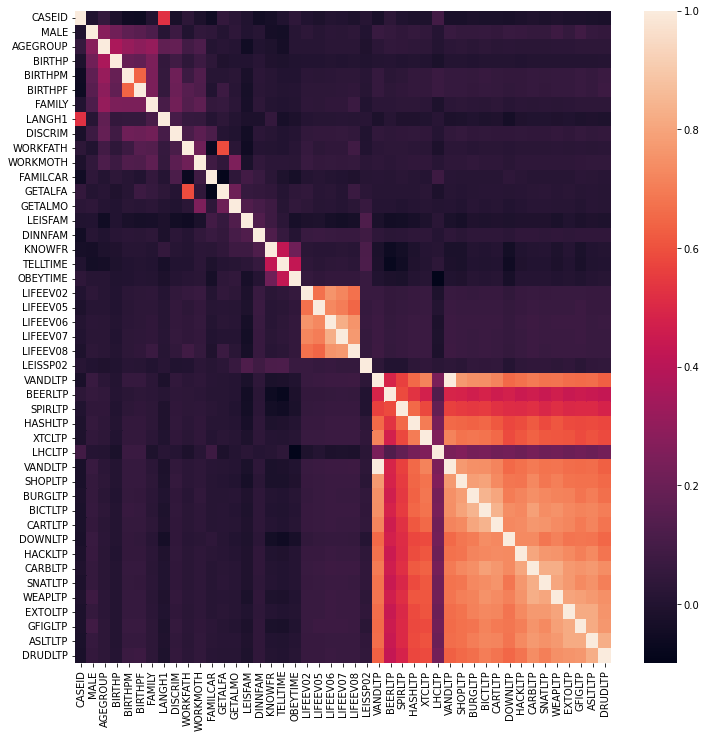

In [101]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df_family.corr());

In [102]:
df_family.columns

Index(['CASEID', 'SCOUNTRY', 'MALE', 'AGEGROUP', 'BIRTHP', 'BIRTHPM',
       'BIRTHPF', 'FAMILY', 'LANGH1', 'DISCRIM', 'WORKFATH', 'WORKMOTH',
       'FAMILCAR', 'GETALFA', 'GETALMO', 'LEISFAM', 'DINNFAM', 'KNOWFR',
       'TELLTIME', 'OBEYTIME', 'LIFEEV02', 'LIFEEV05', 'LIFEEV06', 'LIFEEV07',
       'LIFEEV08', 'LEISSP02', 'VANDLTP', 'BEERLTP', 'SPIRLTP', 'HASHLTP',
       'XTCLTP', 'LHCLTP', 'VANDLTP', 'SHOPLTP', 'BURGLTP', 'BICTLTP',
       'CARTLTP', 'DOWNLTP', 'HACKLTP', 'CARBLTP', 'SNATLTP', 'WEAPLTP',
       'EXTOLTP', 'GFIGLTP', 'ASLTLTP', 'DRUDLTP'],
      dtype='object')

### Output new dataframe to CSV

In [103]:
#from google.colab import files

# Use this to save dataset to CSV
# df_family.to_csv('data230_family.csv') 
# files.download('data230_family.csv')